In [23]:
import numpy as np
import xarray as xr

import discretisedfield as df

In [24]:
mesh = df.Mesh(p1=(0, 0, 0), p2=(20, 10, 5), cell=(1, 1, 1))
field0 = df.Field(mesh, dim=3, value=(0, 0, 1), norm=1)

Four additional fields with changed value, to resemble a time series.

In [25]:
field1 = df.Field(mesh, dim=3, value=(1, 0, 2), norm=1)
field2 = df.Field(mesh, dim=3, value=(1, 0, 1), norm=1)
field3 = df.Field(mesh, dim=3, value=(2, 0, 1), norm=1)
field4 = df.Field(mesh, dim=3, value=(1, 0, 0), norm=1)

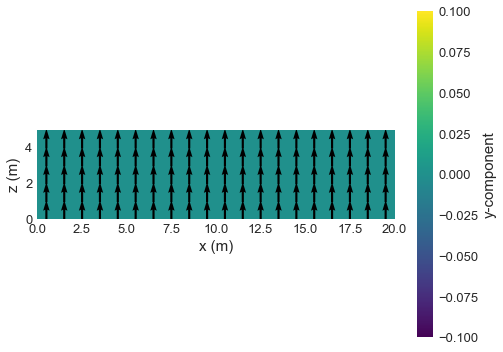

In [4]:
field0.plane("y").mpl()

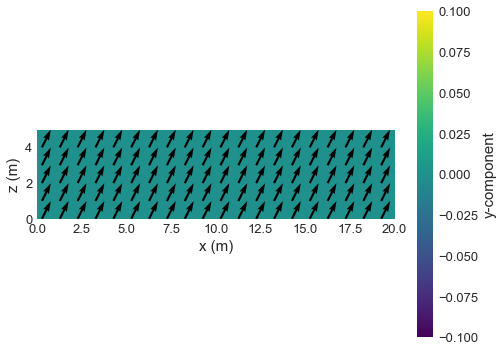

In [5]:
field1.plane("y").mpl()

### Coordinates of the mesh/in time
Mesh coordinates shoud at some point be available from `df.Mesh`.

In [26]:
x = np.linspace(0.5, 19.5, 20)
y = np.linspace(0.5, 9.5, 10)
z = np.linspace(0.5, 4.5, 5)
t = np.linspace(0, 4, 5)

---
# Single field

### DataArray

In [27]:
data = xr.DataArray(
    field0.array,
    dims=("x", "y", "z", "vector"),
    coords={"x": x, "y": y, "z": z, "vector": ["mx", "my", "mz"]},
)
data

<xarray.DataArray (x: 20, y: 10, z: 5, vector: 3)>
array([[[[0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.]],

        [[0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.]],

        [[0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.]],

        ...,

...

        ...,

        [[0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.]],

        [[0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.]],

        [[0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.]]]])
Coordinates:
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 15.5 16.5 17.5 18.5 19.5
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * z        (z) float64 0.5 1.5 2.5 3.5 4.5
  * vector   (vector) <U2 'mx' 'my' 'mz'

4 different access methods (for the same point):

In [8]:
data[0, 0, 0]

<xarray.DataArray (vector: 3)>
array([0., 0., 1.])
Coordinates:
    x        float64 0.5
    y        float64 0.5
    z        float64 0.5
  * vector   (vector) <U2 'mx' 'my' 'mz'

In [9]:
data.loc[0.5, 0.5, 0.5]

<xarray.DataArray (vector: 3)>
array([0., 0., 1.])
Coordinates:
    x        float64 0.5
    y        float64 0.5
    z        float64 0.5
  * vector   (vector) <U2 'mx' 'my' 'mz'

In [10]:
data.isel(x=0, y=0, z=0)

<xarray.DataArray (vector: 3)>
array([0., 0., 1.])
Coordinates:
    x        float64 0.5
    y        float64 0.5
    z        float64 0.5
  * vector   (vector) <U2 'mx' 'my' 'mz'

In [30]:
data.sel(x=0.5, y=0.5, z=0.5, vector="mx")  # .sel(vector='mx')

<xarray.DataArray ()>
array(0.)
Coordinates:
    x        float64 0.5
    y        float64 0.5
    z        float64 0.5
    vector   <U2 'mx'

Getting one vector component

In [12]:
data.sel(vector="mx")

<xarray.DataArray (x: 20, y: 10, z: 5)>
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
...
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])
Coordinates:
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 15.5 16.5 17.5 18.5 19.5
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * z        (z) float64 0.5 1.5 2.5 3.5 4.5
    vector   <U2 'mx'

In [13]:
data["vector"]

<xarray.DataArray 'vector' (vector: 3)>
array(['mx', 'my', 'mz'], dtype='<U2')
Coordinates:
  * vector   (vector) <U2 'mx' 'my' 'mz'

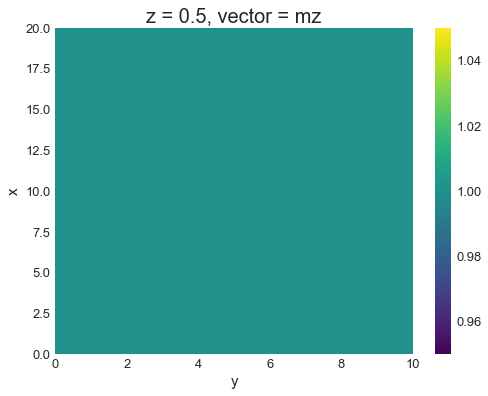

In [14]:
data.sel(z=0.5, vector="mz").plot()

### Dataset

In [31]:
dataset = xr.Dataset(
    {
        "mx": (["x", "y", "z"], field0.array[..., 0]),  # field0.x
        "my": (["x", "y", "z"], field0.array[..., 1]),
        "mz": (["x", "y", "z"], field0.array[..., 2]),
    },
    coords={
        "x": x,
        "y": y,
        "z": z,
    },
)
dataset

<xarray.Dataset>
Dimensions:  (x: 20, y: 10, z: 5)
Coordinates:
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 15.5 16.5 17.5 18.5 19.5
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * z        (z) float64 0.5 1.5 2.5 3.5 4.5
Data variables:
    mx       (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    my       (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mz       (x, y, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

In [16]:
dataset.loc[dict(x=0.5, y=0.5, z=0.5)]

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    x        float64 0.5
    y        float64 0.5
    z        float64 0.5
Data variables:
    mx       float64 0.0
    my       float64 0.0
    mz       float64 1.0

In [35]:
dataset[{"x": 0, "y": 0, "z": 0}]

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    x        float64 0.5
    y        float64 0.5
    z        float64 0.5
Data variables:
    mx       float64 0.0
    my       float64 0.0
    mz       float64 1.0

In [50]:
dataset.mx

<xarray.DataArray 'mx' (x: 20, y: 10, z: 5)>
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
...
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])
Coordinates:
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 15.5 16.5 17.5 18.5 19.5
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * z        (z) float64 0.5 1.5 2.5 3.5 4.5

Access to the underlying numpy array

In [55]:
type(dataset.to_array().data)

numpy.ndarray

In [41]:
dataset.sel(x=0.5, y=0.5, z=0.5).to_array().data

array([0., 0., 1.])

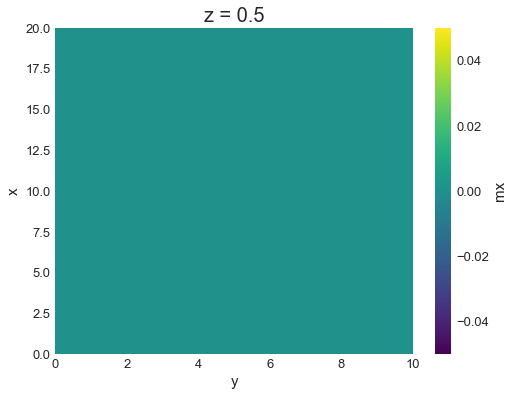

In [20]:
dataset.mx.sel(z=0.5).plot()

---
# Time series

In [21]:
data = xr.DataArray(
    np.stack([field0.array, field1.array, field2.array, field3.array, field4.array]),
    dims=("t", "x", "y", "z", "vector"),
    coords={"t": t, "x": x, "y": y, "z": z, "vector": ["mx", "my", "mz"]},
)
data

<xarray.DataArray (t: 5, x: 20, y: 10, z: 5, vector: 3)>
array([[[[[0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ]],

         [[0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ]],

         [[0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ],
          [0.        , 0.        , 1.        ]],

         ...,

...

         ...,

         [[1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ]],

         [[1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ]],

         [[1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ],
          [1.        , 0.        , 0.        ]]]]])
Coordinates:
  * t        (t) float64 0.0 1.0 2.0 3.0 4.0
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 15.5 16.5 17.5 18.5 19.5
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * z        (z) float64 0.5 1.5 2.5 3.5 4.5
  * vector   (vector) <U2 'mx' 'my' 'mz'

In [22]:
dataset = xr.Dataset(
    {
        "mx": (
            ["t", "x", "y", "z"],
            np.stack(
                [
                    field0.array[..., 0],
                    field1.array[..., 0],
                    field2.array[..., 0],
                    field3.array[..., 0],
                    field4.array[..., 0],
                ]
            ),
        ),
        "my": (
            ["t", "x", "y", "z"],
            np.stack(
                [
                    field0.array[..., 1],
                    field1.array[..., 1],
                    field2.array[..., 1],
                    field3.array[..., 1],
                    field4.array[..., 1],
                ]
            ),
        ),
        "mz": (
            ["t", "x", "y", "z"],
            np.stack(
                [
                    field0.array[..., 2],
                    field1.array[..., 2],
                    field2.array[..., 2],
                    field3.array[..., 2],
                    field4.array[..., 2],
                ]
            ),
        ),
    },
    coords={
        "t": t,
        "x": x,
        "y": y,
        "z": z,
    },
)
dataset

<xarray.Dataset>
Dimensions:  (t: 5, x: 20, y: 10, z: 5)
Coordinates:
  * t        (t) float64 0.0 1.0 2.0 3.0 4.0
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 15.5 16.5 17.5 18.5 19.5
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * z        (z) float64 0.5 1.5 2.5 3.5 4.5
Data variables:
    mx       (t, x, y, z) float64 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
    my       (t, x, y, z) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mz       (t, x, y, z) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0